In [21]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd 

clean_df = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/clean_tabla.csv', index_col=0)

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = clean_df.copy()
df.head(5)

,escuela_id,sexo,indice_socioeconomico,nivel_desemp_matematica,nivel_desemp_lengua,nivel_desemp_ciencias_sociales,nivel_desemp_ciencias_naturales,tiene_notebook,tiene_pc,tiene_tablet,tiene_celular,tiene_smartphone,tiene_consola,tiene_smarttv,tiene_cable,repeticion_primaria,repeticion_secundaria,nivel_id,year_id,ambito,gestion,icse,icse_cat,indice_socioeconomico_medio,indice_socioeconomico_medio_cat,tecnica,tiene_internet,subvencion,dependencia,tasa_con_nbi,mate_nc_na,lengua_nc_na,sociales_nc_na,naturales_nc_na,Mate_avanzado,Mate_satisfactorio,Mate_Basico,Mate_Bajo_Basico,lengua_avanzado,lengua_satisfactorio,lengua_Basico,lengua_Bajo_Basico,sociales_avanzado,sociales_satisfactorio,sociales_Basico,sociales_Bajo_Basico,naturales_avanzado,naturales_satisfactorio,naturales_Basico,naturales_Bajo_Basico,departamento_id,provincia_id
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
608698.0,540901809,0.0,2.0,satisfactorio,satisfactorio,NaN,NaN,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN,2,2016,0,1,-1.000,NaN,2.009901,2.0,0,1.0,1.0,0.0,0.10466,0,0,1,1,0.0,1.162457,0.0,0.000000,0.000000,1.166861,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
457489.0,1152730019,0.0,1.0,por_debajo_del_basico,basico,NaN,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,2,2016,0,1,-1.000,NaN,2.196429,2.0,0,1.0,1.0,0.0,0.10466,0,0,1,1,0.0,0.000000,0.0,1.100506,0.000000,0.000000,1.104708,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1563023.0,1145017919,0.0,2.0,NaN,NaN,NaN,satisfactorio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2,2017,0,0,0.267,0.0,1.816327,1.0,0,1.0,2.0,0.0,0.10466,1,1,1,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.537383,0.0,0.000000,0.0,0.0
1795162.0,1022298417,0.0,1.0,NaN,NaN,basico,por_debajo_del_basico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2,2017,0,0,0.442,1.0,1.865169,1.0,0,0.0,2.0,0.0,0.10466,1,1,0,0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.169184,0.0,0.0,0.000000,0.0,1.166764,0.0,0.0
508042.0,1152730019,0.0,1.0,satisfactorio,avanzado,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,2,2016,0,1,-1.000,NaN,2.196429,2.0,0,1.0,1.0,0.0,0.10466,0,0,1,1,0.0,1.100506,0.0,0.000000,1.104708,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [ ]:
#Keep only Secundaria
data = df[(df.nivel_id == 3)].copy()

In [ ]:
to_keep = ['tiene_smartphone', 'indice_socioeconomico', 'indice_socioeconomico_medio_cat']
data = data[to_keep].dropna()
data

,tiene_smartphone,indice_socioeconomico,indice_socioeconomico_medio_cat
id,,,
1037297.0,1.0,1.0,1.0
1014085.0,1.0,1.0,1.0
1130145.0,1.0,1.0,1.0
1047308.0,0.0,1.0,1.0
1206413.0,1.0,2.0,1.0
...,...,...,...
1000351.0,1.0,2.0,2.0
1122927.0,0.0,1.0,2.0
973858.0,1.0,2.0,2.0


In [ ]:
replace = {
    'indice_socioeconomico':{
        0:'low', 1: 'mid', 2:'high'
    },
    'indice_socioeconomico_medio_cat':{
        0:'low', 1: 'mid', 2:'high'
    },
    
}
data.replace(to_replace=replace, value=None, inplace=True)

In [ ]:
data = pd.merge(data, pd.get_dummies(data.indice_socioeconomico, 'ise'), left_index=True, right_index=True)
data = pd.merge(data, pd.get_dummies(data.indice_socioeconomico_medio_cat, 'ise_cat'), left_index=True, right_index=True)

In [ ]:
data.drop(columns=['indice_socioeconomico', 'indice_socioeconomico_medio_cat'],axis=1,inplace=True)
data

,tiene_smartphone,ise_high,ise_low,ise_mid,ise_cat_high,ise_cat_low,ise_cat_mid
id,,,,,,,
1037297.0,1.0,0,0,1,0,0,1
1014085.0,1.0,0,0,1,0,0,1
1130145.0,1.0,0,0,1,0,0,1
1047308.0,0.0,0,0,1,0,0,1
1206413.0,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...
1000351.0,1.0,1,0,0,1,0,0
1122927.0,0.0,0,0,1,1,0,0
973858.0,1.0,1,0,0,1,0,0


In [ ]:
targets = data.drop_duplicates().sort_values(by=['tiene_smartphone', 'ise_high', "ise_cat_high", 'ise_mid','ise_cat_mid','ise_low', 'ise_cat_low'], ascending=False)
targets

,tiene_smartphone,ise_high,ise_low,ise_mid,ise_cat_high,ise_cat_low,ise_cat_mid
id,,,,,,,
1027860.0,1.0,1,0,0,1,0,0
1206413.0,1.0,1,0,0,0,0,1
1229774.0,1.0,1,0,0,0,1,0
1024544.0,1.0,0,0,1,1,0,0
980910.0,1.0,0,1,0,1,0,0
1037297.0,1.0,0,0,1,0,0,1
964912.0,1.0,0,0,1,0,1,0
978629.0,1.0,0,1,0,0,0,1
1044496.0,1.0,0,1,0,0,1,0


In [ ]:
probs = []
for i in range(0, len(targets)):
    probs.append((data == targets.iloc[i,]).all(axis=1).mean())
probs

[0.12826825563391134,
 0.012970287584481151,
 0.0011557682005973304,
 0.1541317795895005,
 0.002946291635173512,
 0.07156590080206644,
 0.01130818283886023,
 0.006182442596846037,
 0.0037424875066961174,
 0.03286417705635012,
 0.008560022895217689,
 0.0013832527353180748,
 0.1588025507620732,
 0.013920585882750068,
 0.18842690775135207,
 0.05937713266751301,
 0.06719966537758763,
 0.07719430848370551]

In [ ]:
sums = []
for i in range(0, len(targets)):
    sums.append((data == targets.iloc[i,]).all(axis=1).sum())
sums

[34959,
 3535,
 315,
 42008,
 803,
 19505,
 3082,
 1685,
 1020,
 8957,
 2333,
 377,
 43281,
 3794,
 51355,
 16183,
 18315,
 21039]

In [ ]:
passed_df = pd.merge(data.copy(), df[['nivel_desemp_matematica']].copy(), left_index=True, right_index=True)


replace = {
    'nivel_desemp_matematica':{
        'basico': 0, 'por_debajo_del_basico': 0, 'satisfactorio': 1, 'avanzado': 1
    }
}
passed_df.replace(to_replace=replace, value=None, inplace=True)
passed_df = passed_df.dropna()
passed_df

,tiene_smartphone,ise_high,ise_low,ise_mid,ise_cat_high,ise_cat_low,ise_cat_mid,nivel_desemp_matematica
id,,,,,,,,
1037297.0,1.0,0,0,1,0,0,1,0.0
1014085.0,1.0,0,0,1,0,0,1,0.0
1130145.0,1.0,0,0,1,0,0,1,1.0
1047308.0,0.0,0,0,1,0,0,1,0.0
1206413.0,1.0,1,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...
1000351.0,1.0,1,0,0,1,0,0,0.0
1122927.0,0.0,0,0,1,1,0,0,1.0
973858.0,1.0,1,0,0,1,0,0,1.0


In [ ]:
passed_df.nivel_desemp_matematica.mean()
probs

[0.12826825563391134,
 0.012970287584481151,
 0.0011557682005973304,
 0.1541317795895005,
 0.002946291635173512,
 0.07156590080206644,
 0.01130818283886023,
 0.006182442596846037,
 0.0037424875066961174,
 0.03286417705635012,
 0.008560022895217689,
 0.0013832527353180748,
 0.1588025507620732,
 0.013920585882750068,
 0.18842690775135207,
 0.05937713266751301,
 0.06719966537758763,
 0.07719430848370551]

In [ ]:
x = np.linspace(-2, 2, num=19)
x = x[x != 0]

f = lambda x: 0.01*np.sin(np.pi/18*x)
optimista = f(x)[::-1]+probs
probs

[0.12826825563391134,
 0.012970287584481151,
 0.0011557682005973304,
 0.1541317795895005,
 0.002946291635173512,
 0.07156590080206644,
 0.01130818283886023,
 0.006182442596846037,
 0.0037424875066961174,
 0.03286417705635012,
 0.008560022895217689,
 0.0013832527353180748,
 0.1588025507620732,
 0.013920585882750068,
 0.18842690775135207,
 0.05937713266751301,
 0.06719966537758763,
 0.07719430848370551]

In [25]:
x = np.linspace(1, 18, num=18)

f = lambda x: 0.01/32*x*x
optimista = (f(x)[::-1]+probs)/sum(f(x)[::-1]+probs)
optimista

array([0.13834214, 0.06225371, 0.04891664, 0.1352838 , 0.03869432,
       0.07496909, 0.03393976, 0.02651795, 0.02109172, 0.03506599,
       0.01721456, 0.01006337, 0.10249918, 0.01309962, 0.11658808,
       0.0374848 , 0.04125804, 0.04671723])

In [ ]:
x = np.linspace(1, 18, num=18)

f = lambda x: 0.001/32*x*x
pesimista = (f(x)+probs)/sum(f(x)+probs)
pesimista

array([0.12036659, 0.01228559, 0.00134817, 0.14507071, 0.00349706,
       0.06819634, 0.01204556, 0.00767651, 0.00588582, 0.03376392,
       0.0115782 , 0.00551948, 0.1539383 , 0.01880614, 0.18337275,
       0.06321112, 0.07151747, 0.08192025])

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

df_f = passed_df # Tomo solamente las filas que no tienen NaN 

# Creo los vectores del input y del output

Y = df_f.nivel_desemp_matematica
X = df_f.drop(['nivel_desemp_matematica'],axis=1)
algoritmo = DecisionTreeClassifier().fit(X, Y) #entreno 100%

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbdc171518>],
      dtype=object)

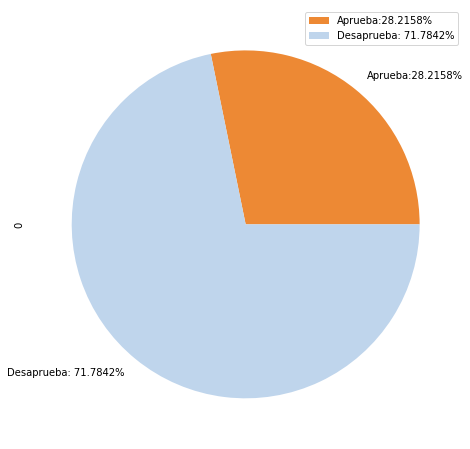

In [26]:


# Prueba modelo
dist = np.random.multinomial(1,probs,1000000)
generated_df = targets.T.dot(dist.T).T
X_prueba = generated_df
Y_prueba = algoritmo.predict(X_prueba)
aprueba = (Y_prueba == 1).sum()
desaprueba = (Y_prueba == 0).sum()

import pandas as pd
df_plt = pd.DataFrame([aprueba,desaprueba], index=['Aprueba:' + str(round(aprueba/(aprueba+desaprueba)*100,5)) + '%' ,'Desaprueba: ' + str(round(desaprueba/(aprueba+desaprueba)*100,5)) + '%'])
df_plt.plot(kind='pie', subplots=True, figsize=(8, 8), colors = ['#ED8934','#BFD5EC'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbdc148160>],
      dtype=object)

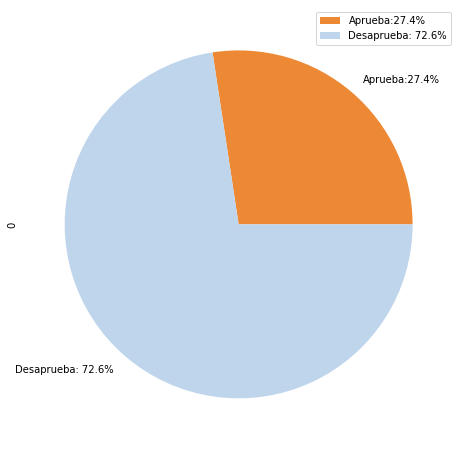

In [27]:


# Prueba modelo
dist = np.random.multinomial(1,optimista,20000)
generated_df = targets.T.dot(dist.T).T
X_prueba = generated_df
Y_prueba = algoritmo.predict(X_prueba)
aprueba = (Y_prueba == 1).sum()
desaprueba = (Y_prueba == 0).sum()

import pandas as pd
df_plt = pd.DataFrame([aprueba,desaprueba], index=['Aprueba:' + str(round(aprueba/(aprueba+desaprueba)*100,5)) + '%' ,'Desaprueba: ' + str(round(desaprueba/(aprueba+desaprueba)*100,5)) + '%'])
df_plt.plot(kind='pie', subplots=True, figsize=(8, 8), colors = ['#ED8934','#BFD5EC'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbdc19e908>],
      dtype=object)

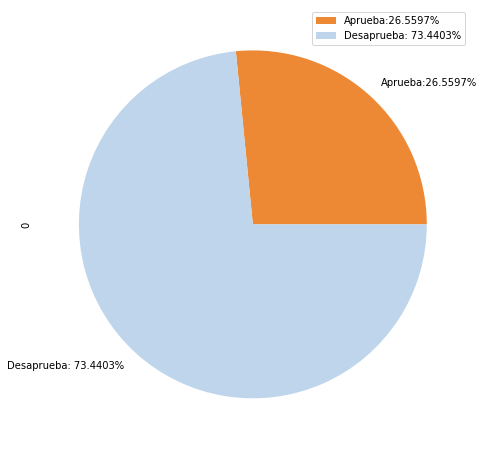

In [24]:


# Prueba modelo
dist = np.random.multinomial(1,pesimista,1000000)
generated_df = targets.T.dot(dist.T).T
X_prueba = generated_df
Y_prueba = algoritmo.predict(X_prueba)
aprueba = (Y_prueba == 1).sum()
desaprueba = (Y_prueba == 0).sum()

import pandas as pd
df_plt = pd.DataFrame([aprueba,desaprueba], index=['Aprueba:' + str(round(aprueba/(aprueba+desaprueba)*100,5)) + '%' ,'Desaprueba: ' + str(round(desaprueba/(aprueba+desaprueba)*100,5)) + '%'])
df_plt.plot(kind='pie', subplots=True, figsize=(8, 8), colors = ['#ED8934','#BFD5EC'])

In [ ]:
test = df[(df.nivel_id == 3) & (df.mate_nc_na == 0)].copy()

In [ ]:
replace = {
    'nivel_desemp_matematica':{
        'basico': 0, 'por_debajo_del_basico': 0, 'satisfactorio': 1, 'avanzado': 1
    }
}
test.replace(to_replace=replace, value=None, inplace=True)

In [ ]:
test.year_id.value_counts()

In [ ]:
test.groupby(by='year_id')['nivel_desemp_matematica'].mean()

In [ ]:
(0.358060-0.322552)/3